Part 1 - Data Preprocessing

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
# Importing the training set
dataset_ts = pd.read_csv('/content/drive/MyDrive/Datasets/BUNDESBANK-BBK01_WT5511.csv')

dataset_ts.head()

,Date,Value
0,30-04-1968,39.10
1,31-05-1968,42.00
2,30-06-1968,40.95
3,31-07-1968,38.90
4,31-08-1968,39.85


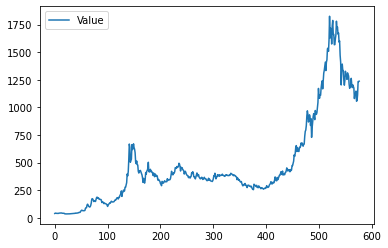

In [98]:
dataset_ts.plot()
plt.show()

In [99]:
dataset_ts.shape

(577, 2)

In [100]:
dataset_train = dataset_ts.iloc[:567,:]
dataset_train.shape

(567, 2)

In [101]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([39.1 , 42.  , 40.95, 38.9 , 39.85])

In [102]:
training_set.shape

(567,)

Feature Scaling

In [103]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [104]:
training_set_scaled[:5]

array([[0.00230037],
       [0.00391955],
       [0.0033333 ],
       [0.0021887 ],
       [0.00271912]])

Creating a data structure with timesteps and 1 output

In [105]:
timesteps=10
trn_size = dataset_train.shape[0]
trn_size

567

In [106]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [107]:
X_train.shape

(557, 10)

In [108]:
X_train[:1]

array([[0.00230037, 0.00391955, 0.0033333 , 0.0021887 , 0.00271912,
        0.00263537, 0.0023562 , 0.00271912, 0.00389164, 0.00422664]])

In [109]:
y_train[:5]

array([0.00435227, 0.00453373, 0.0048129 , 0.00456165, 0.00348684])

In [110]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(557, 10, 1)

Part 2 - Building the RNN

In [111]:
import tensorflow as tf
from tensorflow import keras

In [112]:
(X_train.shape[1],X_train.shape[2])

(10, 1)

Initialising the RNN

In [113]:
tf.random.set_seed(seed=2022)
model = keras.Sequential([
   tf.keras.layers.LSTM(units=100,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ),
   tf.keras.layers.LSTM(units=70,return_sequences = True ) ,
   tf.keras.layers.LSTM(units=50 ) ,
   tf.keras.layers.Dense(1)                           
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 10, 70)            47880     
                                                                 
 lstm_14 (LSTM)              (None, 50)                24200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 112,931
Trainable params: 112,931
Non-trainable params: 0
_________________________________________________________________


Fitting the RNN to the Training set

In [115]:
model.fit(X_train, y_train, epochs = 50, batch_size = 25)

Epoch 1/50
23/23 [==============================] - 4s 6ms/step - loss: 0.0266
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 9/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 10/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 11/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 12/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 13/50
23/23 [==============================

Part 3 - Making the predictions and visualising the results

In [116]:
dataset_test = dataset_ts.iloc[567:,:]
test_set = dataset_test.iloc[:, 1].values
test_set.shape

(10,)

In [117]:
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
dataset_total

0        39.10
1        42.00
2        40.95
3        38.90
4        39.85
        ...   
572    1062.25
573    1112.90
574    1234.15
575    1233.60
576    1237.70
Name: Value, Length: 577, dtype: float64

In [118]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

20

In [119]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(10, 10, 1)

In [120]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 1s 1s/step


array([[0.65022564],
       [0.636302  ],
       [0.6221484 ],
       [0.6121487 ],
       [0.60947526],
       [0.6043831 ],
       [0.5961063 ],
       [0.5926392 ],
       [0.60597336],
       [0.62870204]], dtype=float32)

In [121]:
predicted_values.shape

(10, 1)

In [122]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[1199.5471],
       [1174.6096],
       [1149.2603],
       [1131.3506],
       [1126.5624],
       [1117.4423],
       [1102.6183],
       [1096.4087],
       [1120.2904],
       [1160.9979]], dtype=float32)

Visualising the results

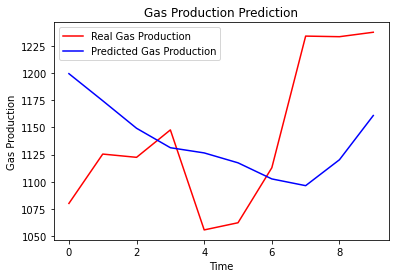

In [123]:
plt.plot(test_set, color = 'red', label = 'Real Gas Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Production')
plt.title('Gas Production Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()

Root Mean Square Error

In [124]:
print(np.sqrt(mean_squared_error(predicted_values,test_set)))

79.71936619465393
